In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import numpy as np

# Função para calcular atrasados, adiantos e pontuais

In [2]:
def df_hours(x):
    hora_prevista = x['CH_prevista']
    hora_entreposto = x['CH_entreposto']
    maximo = hora_prevista + timedelta(hours=1,minutes=1)
    minimo = hora_prevista - timedelta(hours=1,minutes=1)
        
    if hora_entreposto >= maximo:
        return 'atrasado'
    elif hora_entreposto <= minimo:
        return 'adiantado'
    else:
        return 'pontual'
  

# Leitura do CSV e gráfico de viagens dos motoristas

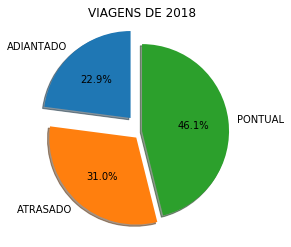

In [3]:
df = pd.read_csv('data/final-dataset1.csv',encoding='ISO-8859-1', low_memory=False)

pd.set_option('display.max_columns', None)

df['CH_entreposto'] = pd.to_datetime(df['Chegada ao Entreposto'], format='%d/%m/%Y %H:%M:%S')
df['CH_prevista'] = pd.to_datetime(df['Chegada Prevista'], format='%d/%m/%Y %H:%M:%S')

times = list()


df['Pontos'] = df[['CH_prevista', 'CH_entreposto']].apply(df_hours,axis=1)

atrasados = list(filter(lambda x: x=='atrasado', df['Pontos']))
pontuais = list(filter(lambda x: x=='pontual', df['Pontos']))
adiantados = list(filter(lambda x: x=='adiantado', df['Pontos']))


labels = 'ADIANTADO', 'ATRASADO', 'PONTUAL'
sizes = [len(adiantados), len(atrasados), len (pontuais)]
explode = (0.2,0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('VIAGENS DE 2018')
plt.show()
    


In [4]:
def p_month(meses,produtos):
    meses_set = meses.unique()

    
    mes_01 = list()
    mes_02 = list()
    mes_03 = list()
    mes_04 = list()
    mes_05 = list()
    mes_06 = list()
    mes_07 = list()
    mes_08 = list()
    mes_09 = list()
    mes_10 = list()
    mes_11 = list()
    mes_12 = list()
    
    for i in range(len(meses)):
        if meses[i] == 1:
                mes_01.append(produtos[i])
        elif meses[i] == 2:
                mes_02.append(produtos[i])
        elif meses[i] == 3:
                mes_03.append(produtos[i])
        elif meses[i] == 4:
                mes_04.append(produtos[i])
        elif meses[i] == 5:
                mes_05.append(produtos[i])
        elif meses[i] == 6:
                mes_06.append(produtos[i])
        elif meses[i] == 7:
                mes_07.append(produtos[i])
        elif meses[i] == 8:
                mes_08.append(produtos[i])
        elif meses[i] == 9:
                mes_09.append(produtos[i])
        elif meses[i] == 10:
                mes_10.append(produtos[i])
        elif meses[i] == 11:
                mes_11.append(produtos[i])
        elif meses[i] == 12:
                mes_12.append(produtos[i])
    
    dic = dict.fromkeys(meses_set, [])
    df = pd.DataFrame(list(zip(mes_01,mes_02,mes_03,mes_04,mes_05,
            mes_06,mes_07,mes_08,mes_09,mes_10,
            mes_11,mes_12)),columns=list(meses_set))        
    return df

In [5]:
def __filter(produto):
    
    soja = list(filter(lambda x: x == 'Soja' or x == 'Soja Cargil'
                       or x == 'Soja Cutrale', produto))
    milho= list(filter(lambda x: x == 'Milho', produto))
    
    return soja, milho

# Gráfico dos produtos por mês

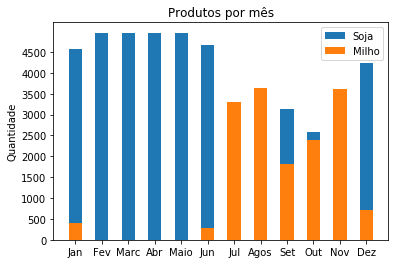

In [6]:
df['Meses'] = pd.to_datetime(df['Agendamento'], format='%d/%m/%Y %H:%M:%S').dt.month
df['Anos'] = pd.to_datetime(df['Agendamento'], format='%d/%m/%Y %H:%M:%S').dt.year
p_m = df[['Meses', 'Produto']].groupby('Meses')

N = 12
df_prod = p_month(df['Meses'], df['Produto'])



soja_01, milho_01 = __filter(df_prod[1])
soja_02, milho_02 = __filter(df_prod[2])
soja_03, milho_03 = __filter(df_prod[3])
soja_04, milho_04 = __filter(df_prod[4])
soja_05, milho_05 = __filter(df_prod[5])
soja_06, milho_06 = __filter(df_prod[6])
soja_07, milho_07 = __filter(df_prod[7])
soja_08, milho_08 = __filter(df_prod[8])
soja_09, milho_09 = __filter(df_prod[9])
soja_10, milho_10 = __filter(df_prod[10])
soja_11, milho_11 = __filter(df_prod[11])
soja_12, milho_12 = __filter(df_prod[12])

soja_means = (len(soja_01),len(soja_02), len(soja_03), len(soja_04), len(soja_05), len(soja_06),
             len(soja_07), len(soja_08), len(soja_09), len(soja_10), len(soja_11), len(soja_12))

milho_means = (len(milho_01),len(milho_02), len(milho_03), len(milho_04), len(milho_05), len(milho_06),
             len(milho_07), len(milho_08), len(milho_09), len(milho_10), len(milho_11), len(milho_12))

ind = np.arange(N) # x 
width = 0.50

soja = plt.bar(ind, soja_means, width)
milho = plt.bar(ind,milho_means, width)

plt.ylabel('Quantidade')
plt.title('Produtos por mês')
plt.xticks(ind, ('Jan', 'Fev', 'Marc', 'Abr', 'Maio', 'Jun', 'Jul',
                 'Agos', 'Set', 'Out', 'Nov', 'Dez'))
plt.yticks(np.arange(0,5000,500))
plt.legend((soja[0],milho[0]), ('Soja','Milho'))

plt.show()


# Gráfico das situações dos caminhoneiros por mês

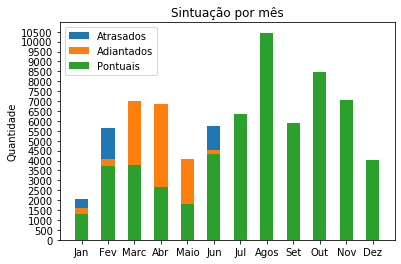

In [7]:
#pontos_m = df[['Meses', 'Pontos']].groupby('Meses')['Pontos'].apply(lambda tags: ' '.join(tags))
pontos_m1 = df[['Meses', 'Pontos']].groupby('Meses')['Pontos'].apply(lambda x: x.tolist()).reset_index().sort_values(by='Meses')
# df_pontos = pontos_m.groupby('Meses')

mes_1_pontuais = len(list(filter(lambda x: x == 'pontual',pontos_m1['Pontos'][0])))
mes_1_atrasados = len(list(filter(lambda x: x == 'atrasado',pontos_m1['Pontos'][0])))
mes_1_adiantado = len(list(filter(lambda x: x == 'adiantado',pontos_m1['Pontos'][0])))

mes_2_pontuais = len(list(filter(lambda x: x == 'pontual',pontos_m1['Pontos'][1])))
mes_2_atrasados = len(list(filter(lambda x: x == 'atrasado',pontos_m1['Pontos'][1])))
mes_2_adiantado = len(list(filter(lambda x: x == 'adiantado',pontos_m1['Pontos'][1])))

mes_3_pontuais = len(list(filter(lambda x: x == 'pontual',pontos_m1['Pontos'][2])))
mes_3_atrasados = len(list(filter(lambda x: x == 'atrasado',pontos_m1['Pontos'][2])))
mes_3_adiantado = len(list(filter(lambda x: x == 'adiantado',pontos_m1['Pontos'][2])))

mes_4_pontuais = len(list(filter(lambda x: x == 'pontual',pontos_m1['Pontos'][3])))
mes_4_atrasados = len(list(filter(lambda x: x == 'atrasado',pontos_m1['Pontos'][3])))
mes_4_adiantado = len(list(filter(lambda x: x == 'adiantado',pontos_m1['Pontos'][3])))

mes_5_pontuais = len(list(filter(lambda x: x == 'pontual',pontos_m1['Pontos'][4])))
mes_5_atrasados = len(list(filter(lambda x: x == 'atrasado',pontos_m1['Pontos'][4])))
mes_5_adiantado = len(list(filter(lambda x: x == 'adiantado',pontos_m1['Pontos'][4])))

mes_6_pontuais = len(list(filter(lambda x: x == 'pontual',pontos_m1['Pontos'][5])))
mes_6_atrasados = len(list(filter(lambda x: x == 'atrasado',pontos_m1['Pontos'][5])))
mes_6_adiantado = len(list(filter(lambda x: x == 'adiantado',pontos_m1['Pontos'][5])))

mes_7_pontuais = len(list(filter(lambda x: x == 'pontual',pontos_m1['Pontos'][6])))
mes_7_atrasados = len(list(filter(lambda x: x == 'atrasado',pontos_m1['Pontos'][6])))
mes_7_adiantado = len(list(filter(lambda x: x == 'adiantado',pontos_m1['Pontos'][6])))

mes_8_pontuais = len(list(filter(lambda x: x == 'pontual',pontos_m1['Pontos'][7])))
mes_8_atrasados = len(list(filter(lambda x: x == 'atrasado',pontos_m1['Pontos'][7])))
mes_8_adiantado = len(list(filter(lambda x: x == 'adiantado',pontos_m1['Pontos'][7])))

mes_9_pontuais = len(list(filter(lambda x: x == 'pontual',pontos_m1['Pontos'][8])))
mes_9_atrasados = len(list(filter(lambda x: x == 'atrasado',pontos_m1['Pontos'][8])))
mes_9_adiantado = len(list(filter(lambda x: x == 'adiantado',pontos_m1['Pontos'][8])))

mes_10_pontuais = len(list(filter(lambda x: x == 'pontual',pontos_m1['Pontos'][9])))
mes_10_atrasados = len(list(filter(lambda x: x == 'atrasado',pontos_m1['Pontos'][9])))
mes_10_adiantado = len(list(filter(lambda x: x == 'adiantado',pontos_m1['Pontos'][9])))

mes_11_pontuais = len(list(filter(lambda x: x == 'pontual',pontos_m1['Pontos'][10])))
mes_11_atrasados = len(list(filter(lambda x: x == 'atrasado',pontos_m1['Pontos'][10])))
mes_11_adiantado = len(list(filter(lambda x: x == 'adiantado',pontos_m1['Pontos'][10])))

mes_12_pontuais = len(list(filter(lambda x: x == 'pontual',pontos_m1['Pontos'][11])))
mes_12_atrasados = len(list(filter(lambda x: x == 'atrasado',pontos_m1['Pontos'][11])))
mes_12_adiantado = len(list(filter(lambda x: x == 'adiantado',pontos_m1['Pontos'][11])))

adiantados_means = (mes_1_adiantado,mes_2_adiantado,mes_3_adiantado,mes_4_adiantado,mes_5_adiantado,mes_6_adiantado,
mes_7_adiantado,mes_8_adiantado,mes_9_adiantado,mes_10_adiantado,mes_11_adiantado,mes_12_adiantado)

atrasados_means = (mes_1_atrasados,mes_2_atrasados,mes_3_atrasados,mes_4_atrasados,mes_5_atrasados,mes_6_atrasados,
mes_7_atrasados,mes_8_atrasados,mes_9_atrasados,mes_10_atrasados,mes_11_atrasados,mes_12_atrasados)

pontuais_means = (mes_1_pontuais,mes_2_pontuais,mes_3_pontuais,mes_4_pontuais,mes_5_pontuais,mes_6_pontuais,
mes_7_pontuais,mes_8_pontuais,mes_9_pontuais,mes_10_pontuais,mes_11_pontuais,mes_12_pontuais)

ind = np.arange(N)

width = 0.50

atrasados = plt.bar(ind, atrasados_means, width)
adiantados = plt.bar(ind,adiantados_means, width)
pontuais = plt.bar(ind,pontuais_means, width)

plt.ylabel('Quantidade')
plt.title('Sintuação por mês')
plt.xticks(ind, ('Jan', 'Fev', 'Marc', 'Abr', 'Maio', 'Jun', 'Jul',
                 'Agos', 'Set', 'Out', 'Nov', 'Dez'))
plt.yticks(np.arange(0,11000,500))
plt.legend((atrasados[0],adiantados[0],pontuais[0]), ('Atrasados','Adiantados','Pontuais'))

plt.show()

# Periodos mais cheios no terminal - chegada entreposto - horas

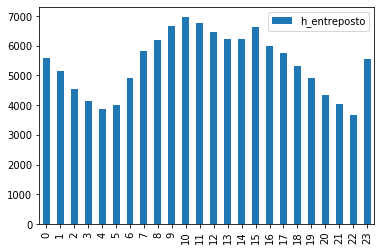

In [8]:
df['h_entreposto'] = pd.to_datetime(df['Chegada ao Entreposto'], format='%d/%m/%Y %H:%M:%S').dt.hour
df['h_entreposto'].value_counts().to_frame().sort_index().plot(kind='bar')

# Periodos mais cheios no terminal - chegada prevista - horas

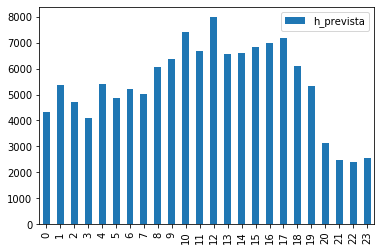

In [9]:
df['h_prevista'] = pd.to_datetime(df['Chegada Prevista'], format='%d/%m/%Y %H:%M:%S').dt.hour
df['h_prevista'].value_counts().to_frame().sort_index().plot(kind='bar')

# Periodos mais cheios no terminal - chegada ao entreposto - dias do mês

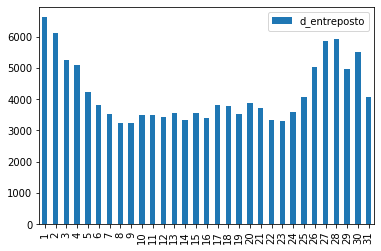

In [10]:
df['d_entreposto'] = pd.to_datetime(df['Chegada ao Entreposto'], format='%d/%m/%Y %H:%M:%S').dt.day
df['d_entreposto'].value_counts().to_frame().sort_index().plot(kind='bar')

# Periodos mais cheios no terminal - chegada prevista - dias do mês

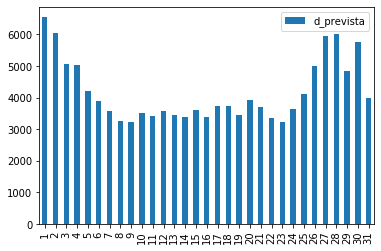

In [11]:
df['d_prevista'] = pd.to_datetime(df['Chegada Prevista'], format='%d/%m/%Y %H:%M:%S').dt.day
df['d_prevista'].value_counts().to_frame().sort_index().plot(kind='bar')

# Periodos mais cheios no terminal - chegada ao entreposto - dias da semana

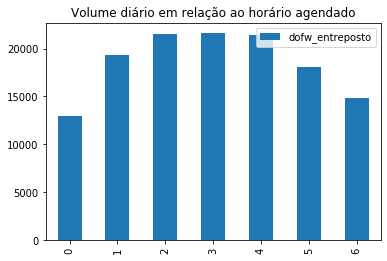

In [12]:
df['dofw_entreposto'] = pd.to_datetime(df['Chegada ao Entreposto'], format='%d/%m/%Y %H:%M:%S').dt.dayofweek
df['dofw_entreposto'].value_counts().to_frame().sort_index().plot(kind='bar',title='Volume diário em relação ao horário agendado')

# Periodos mais cheios no terminal - chegada prevista - dias da semana

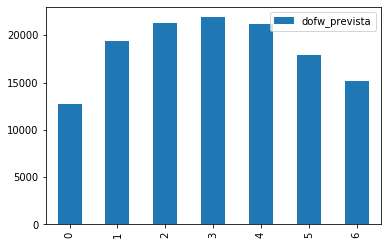

In [13]:
df['dofw_prevista'] = pd.to_datetime(df['Chegada Prevista'], format='%d/%m/%Y %H:%M:%S').dt.dayofweek
df['dofw_prevista'].value_counts().to_frame().sort_index().plot(kind='bar')


# Periodos mais cheios no terminal - agendamento - dias da semana

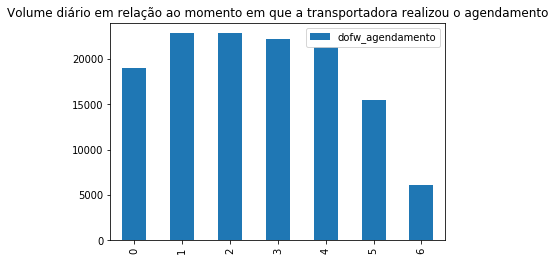

In [14]:
df['dofw_agendamento'] = pd.to_datetime(df['Agendamento'], format='%d/%m/%Y %H:%M:%S').dt.dayofweek
df['dofw_agendamento'].value_counts().to_frame().sort_index().plot(kind='bar',title='Volume diário em relação ao momento em que a transportadora realizou o agendamento')


# Dias das semanas agendados pela ADM - Chegada Prevista

In [15]:
def filter_adm(cliente):
    data = cliente.split(' ')
    
    if(data[0]) == 'ADM':
        return True
    else:
        return False

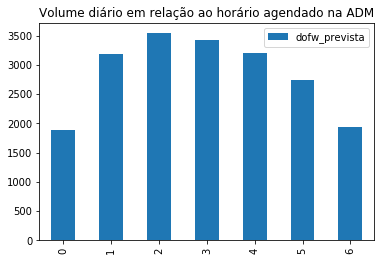

In [16]:
df['dofw_prevista'] = pd.to_datetime(df['Chegada Prevista'], format='%d/%m/%Y %H:%M:%S').dt.dayofweek
df['is_adm'] = df['Cliente'].apply(filter_adm)
df_adm = df.loc[df['is_adm'] == True]

df_adm['dofw_prevista'].value_counts().to_frame().sort_index().plot(kind='bar',title='Volume diário em relação ao horário agendado na ADM')

# Dias das semanas agendados pela ADM - Agendamento

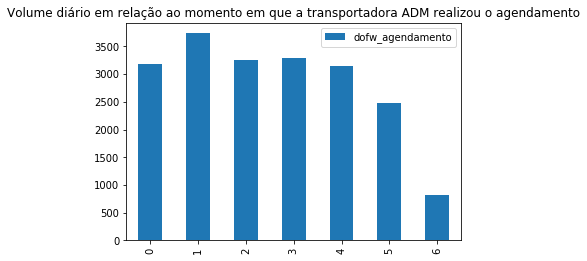

In [17]:
df['dofw_prevista'] = pd.to_datetime(df['Agendamento'], format='%d/%m/%Y %H:%M:%S').dt.dayofweek
df['is_adm'] = df['Cliente'].apply(filter_adm)
df_adm = df.loc[df['is_adm'] == True]

df_adm['dofw_agendamento'].value_counts().to_frame().sort_index().plot(kind='bar',title='Volume diário em relação ao momento em que a transportadora ADM realizou o agendamento')

# Distribuição do tempo das viagens dos top 100 motoristas

In [18]:
def seven_filter(x):
    dif = (x['CH_entreposto'] - x['SA_prevista']).total_seconds()
    hours = divmod(dif,3600)[0] #  = dif/3600
    seven = 7.0
#     print(dif)
    if hours > seven:
        return 'Maior'
    elif hours < seven:
        return 'Menor'
    else: 
        return 'Igual'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f452e1ed850>],
      dtype=object)

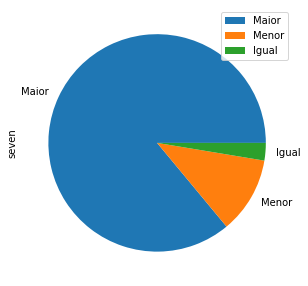

In [19]:
top_100 = df['Motorista'].value_counts()[:100].to_frame()

df_join = df[['Motorista','Saida Prevista','Chegada ao Entreposto']].set_index('Motorista').join(top_100.set_index('Motorista'))
df_join['CH_entreposto'] = pd.to_datetime(df_join['Chegada ao Entreposto'], format='%d/%m/%Y %H:%M:%S')
df_join['SA_prevista'] = pd.to_datetime(df_join['Saida Prevista'], format='%d/%m/%Y %H:%M:%S')
df_join['seven'] = df_join[['SA_prevista','CH_entreposto']].apply(seven_filter,axis=1)
df_join['seven'].value_counts().to_frame().plot.pie(subplots=True,figsize=(5,5))

# Análise do ciclo médio das viagens - mensal e anual

In [20]:
def get_dif(x):
    agendamento = pd.to_datetime(x['Agendamento'], format='%d/%m/%Y %H:%M:%S')
    entreposto = pd.to_datetime(x['Chegada ao Entreposto'], format='%d/%m/%Y %H:%M:%S')
# #     print(agendamento[1],entreposto[1])
    dif_seconds = (entreposto - agendamento).total_seconds()
    hours = divmod(dif_seconds,3600)[0]
    return hours
    

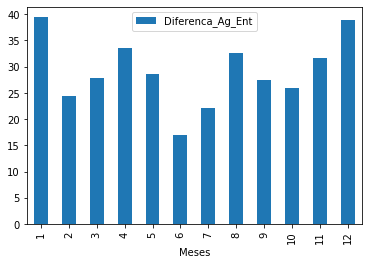

In [39]:
df['Diferenca_Ag_Ent'] = df[['Agendamento','Chegada ao Entreposto']].apply(get_dif,axis=1)
df_mensal = df[['Diferenca_Ag_Ent', 'Meses']].groupby('Meses').mean()
df_anual = df[['Diferenca_Ag_Ent', 'Anos']].groupby('Anos').mean()

df_mensal.plot(kind='bar')


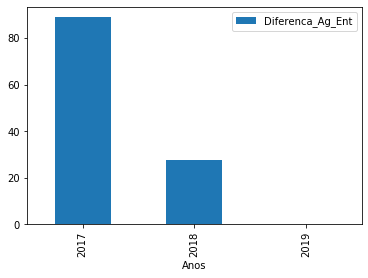

In [41]:
df_anual.plot(kind='bar')

# Análise do ciclo médio das viagens - mensal e anual - ADM

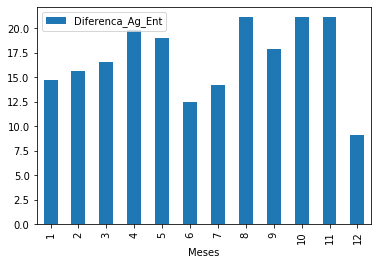

In [66]:
df_mensal_adm = df[['Diferenca_Ag_Ent','is_adm', 'Meses']].groupby(['is_adm','Meses']).mean()
df_anual_adm = df[['Diferenca_Ag_Ent', 'is_adm', 'Anos']].groupby(['is_adm','Anos']).mean()
df_mensal_adm.loc[True].plot(kind='bar')

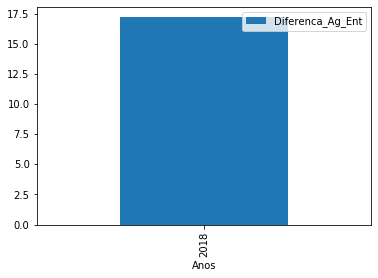

In [67]:
df_anual_adm.loc[True].plot(kind='bar')

# Análise do ciclo médio das viagens dentro do complexo - anual e mensal

In [23]:
def get_dif_ent_saida(x):
    saida = pd.to_datetime(x['Sada do Terminal'], format='%d/%m/%Y %H:%M:%S')
    entreposto = pd.to_datetime(x['Chegada ao Entreposto'], format='%d/%m/%Y %H:%M:%S')
    dif_seconds = (saida - entreposto).total_seconds()
    hours = divmod(dif_seconds,3600)[0]
    return hours
    

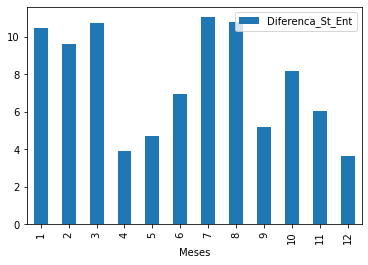

In [36]:
df['Diferenca_St_Ent'] = df[['Sada do Terminal', 'Chegada ao Entreposto']].apply(get_dif_ent_saida,axis=1)
df_mensal_st = df[['Diferenca_St_Ent','Meses']].groupby('Meses').mean()
df_anual_st = df[['Diferenca_St_Ent','Anos']].groupby('Anos').mean()
df_mensal_st.plot(kind='bar')


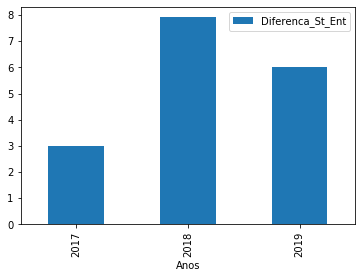

In [34]:
df_anual_st.plot(kind='bar')